In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
from scipy.interpolate import interp1d


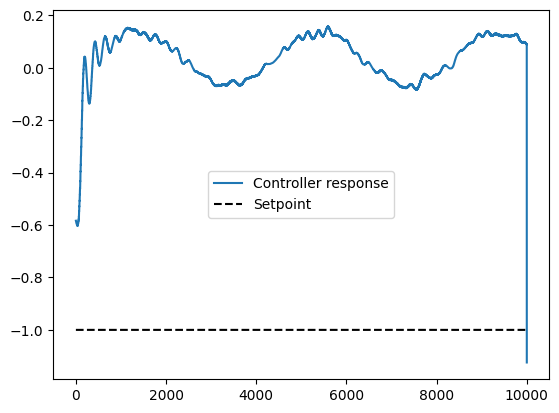

In [2]:
df1 = pd.read_csv("traj.csv")
plt.plot(df1["y"] - df1["gy"], label="Controller response")
plt.plot(0.0 - np.ones_like(df1["gy"]), 'k--', label="Setpoint")
plt.legend()

MSE Piddob: 0.9402195388061947
MSE Rvolmea: 0.9704995191851026


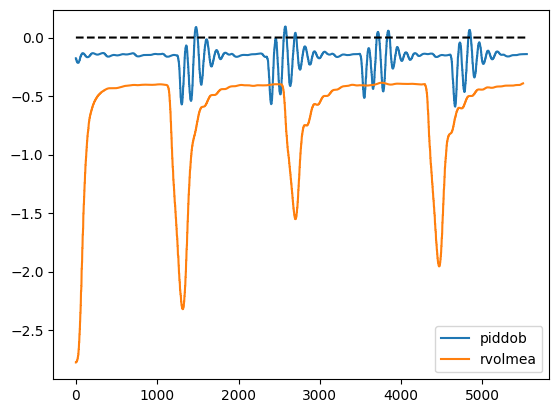

In [24]:
df1 = pd.read_csv('piddob_impulse.csv')
df2 = pd.read_csv('rvolmea_impulse.csv')
plt.plot(df1['z'] - 5, label='piddob')
plt.plot(df2['z'][0:5500] - 5, label='rvolmea')
plt.plot(0 * np.ones(len(df1['z'])), 'k--')
plt.legend()


# Calculate MSE between X/Y/Z - 0,0,5 of both dataframes
mse_piddob = np.mean(df1['x']**2 + df1['y']**2 + (df1['z'] - 5)**2)
mse_rvolmea = np.mean(df2['x'][0:5500]**2 + df2['y'][0:5500]**2 + (df2['z'][0:5500] - 5)**2)
print(f'MSE Piddob: {mse_piddob}')
print(f'MSE Rvolmea: {mse_rvolmea}')



# plt.plot(df1['y'] - 0, label='y')
# plt.plot(df1['z'] - 5.0, label='z')
# plt.plot(0 * np.ones(len(df1['x'])), 'k--')
# plt.legend()

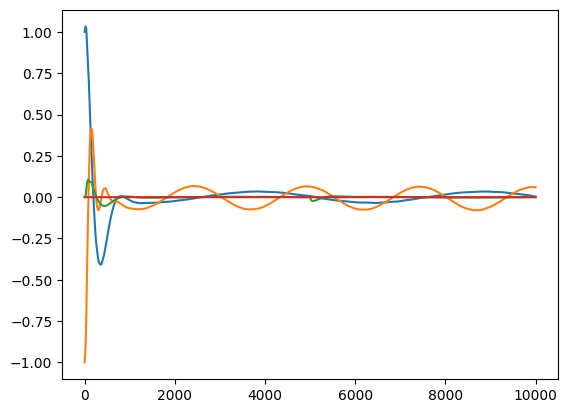

In [5]:
# read the df traj.csv and plot z
df = pd.read_csv('faultless_fo8_adhoc_rvolmea.csv')
plt.plot(df['x'])
plt.plot(df['y'])
plt.plot(df['z'])
plt.plot(0 * np.ones(len(df["x"])))

In [6]:
def generate_waypoints():
    half_points = 32
    total_points = half_points * 2  # 64 total waypoints
    start_x = 0.0
    start_y = 0.0

    # Altitude parameters
    base_z = 2.5  # Corresponds to t_z_ in the original code
    amplitude_z = 0.5

    max_radius = 1.5
    angle_increment = 2.0 * np.pi / half_points

    # Initialize array to hold the waypoints
    waypoints = np.zeros((total_points, 3))

    # --- First 32 waypoints: normal z oscillation ---
    # z = base_z + sin(angle)
    for i in range(half_points):
        angle = angle_increment * i
        x = start_x + max_radius * np.sin(angle)
        y = start_y + max_radius * np.sin(2 * angle)
        z = base_z + amplitude_z * np.sin(angle)
        waypoints[i, :] = [x, y, z]

    # --- Second 32 waypoints: reversed z oscillation ---
    # z = base_z - sin(angle)
    for i in range(half_points):
        angle = angle_increment * i
        index = half_points + i
        # Duplicate x and y from the first half
        x, y = waypoints[i, 0], waypoints[i, 1]
        z = base_z - amplitude_z * np.sin(angle)
        waypoints[index, :] = [x, y, z]

    return waypoints

true_waypoints = generate_waypoints()  # 64 x 3 array

# Create a normalized progress vector for the true setpoints (0 to 1)
true_progress = np.linspace(0, 1, 64)

In [7]:
from scipy.spatial import cKDTree as KDTree
goal_points = true_waypoints
goal_tree = KDTree(goal_points)


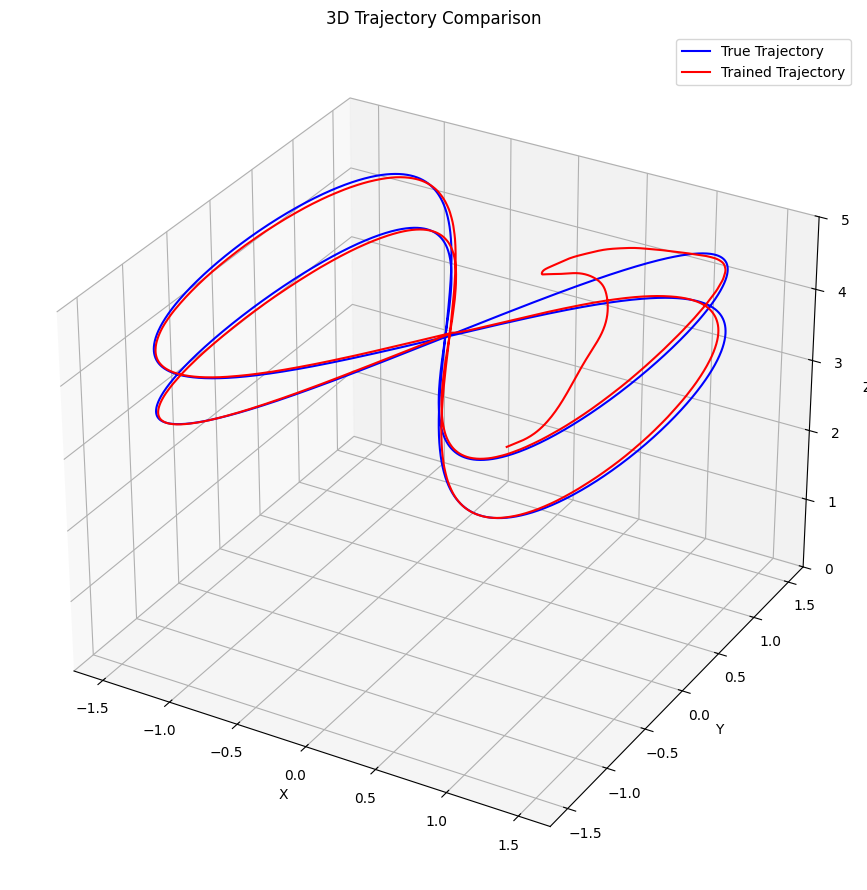

In [ ]:
all_laps = []

# csv_files = glob.glob("./simulated_data/pid_nominal/*.csv")
# Create a new 3D figure
csv_files = ["faultess_fo8_adhoc_rvolmea.csv"]


# lap_distances = []
# lap_errors = []      # Mean error per lap
# lap_errors_std = []  # Standard deviation of error per lap
# lap_labels = []      # Label for each lap (for plotting)


# for i, file in enumerate(csv_files):
#     df = pd.read_csv(file)

#     for lap_id, group in df.groupby("lap"):
#         group = group.reset_index(drop=True)
#         all_laps.append(group)

#         measured_points = group[['x', 'y', 'z']].values
#         distances, _ = goal_tree.query(measured_points)
#         lap_distances.append(distances)
#         mean_err = np.mean(distances)
#         std_err = np.std(distances)
#         lap_errors.append(mean_err)
#         lap_errors_std.append(std_err)


# print(lap_distances)


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
# ax.plot(true_waypoints[:, 1], true_waypoints[:, 0], true_waypoints[:, 2], color="b", markersize=0.1)
ax.plot(df["gx"], df["gy"], df["gz"], color="b", markersize=0.1, label="True Trajectory")
ax.plot(df["gx"] + df["x"],  df["gy"] + df["y"], df["gz"] + df["z"], color="r", markersize=0.1, label="Trained Trajectory")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(0, 5)
ax.legend()
plt.title("RVOLMEA trained controller in training environment")
plt.tight_layout()
plt.show()
# lap_numbers = np.arange(1, len(lap_errors) + 1)
# plt.errorbar(lap_numbers, lap_errors, yerr=lap_errors_std, fmt='o', capsize=5, color='darkorange', markeredgecolor='k')
# plt.xlabel("Lap Number")
# plt.ylabel("Mean Distance Error")
# plt.title("Mean Distance Error for Each Lap (Using cKDTree)")
# plt.xticks(lap_numbers, rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()Measured




